# Tutorial 2- Optimal Control for Continuous State

Please execute the cell below to initialize the notebook environment.

In [1]:
import numpy as np                 # import numpy
import scipy               # import scipy
import random                      # import basic random number generator functions
from scipy.linalg import inv

import matplotlib.pyplot as plt    # import matplotlib

---

## Tutorial objectives

In this tutorial, we will implement the linear qudratic regulator (LQR) in 1D case.

---

## Quadratic cost function 

In general, a linear discrete-time system with noise has the dynamic:

\begin{equation*}
x_{t+1} = Ax_t + Bu_t + w_t 
\end{equation*}

with 

$x_t$: state at time $t$ 

$u_t$: control at time $t$

$w_t$: noise at time $t$

$A$ and $B$: parameters of the linear dynamical system  

In LQR problem,  a quadratic cost function is defined as: 

$$ J(x, u) = \sum_{t = 0}^{T-1} (x_{t}^T Q x_{t} + u_{t}^T R u_{t}) + x_{T}^T Q_T x_{T}$$

where $Q$ and $Q_N$ are the state cost matrices, and $R$ is the control cost matrix. 

For 1D case, $A$, $B$, $Q$, $R$ are all scalars.

The goal of the LQR problem is to find control $\{u_t\}_{t=0}^{T-1}$ such that $J(x, u)$ is minimized.  

---

## Solving LQR
The solution of LQR can be obtained via Dynamic Programming. 
1. set $P_T = Q_T$
2. for $t = T ,...,1$,

    $P_{t-1}  = Q + A^TP_tA - A^TP_tB(R+B^TP_tB)^{-1}B^TP_tA$

3. update the control gain
   
   for $t = T ,...,1$,

    $K_{t-1}  = -(R+B^TP_tB)^{-1}B^TP_tA$

4. optimal gain at time $t$ is: $u_t = K_tx_t$


### Exercise 1: LQR control to the origin

In this exercise, we will design an LQR control for original states, i.e. the state should be zero at all the time. 

For simplicity, we will apply the LQR control on a 1D case, where the matrices reduce to scalars, and the states, control and noise are one-dimensional as well. 

** Suggestions **
* We have provided the code in function control_gain( ) for updating $P$ iteratively as introduced above. Complete the function to update control gain. Note all the parameters are scalar, and regular math operation should be used instead of numpy matrix operation. 
* In function dynamics( ), complete the code for control, and use that complete the dynamical updating function for state $x$.
* Compute the mean square error (MSE) of the states with control and the target states (zero state in the case). 
* With the provided plotting functions, plot the states over time with and without control, the histogram of deviation from the zero state with and without control 

In [2]:
class LQR_1D:
    def __init__(self, T, ini_state, noise_var, target):
        self.T = T
        self.target = target
        self.ini_state = ini_state
        self.noise_var = noise_var
    
    def control_gain(self, a, b, q, r):
        p = np.zeros(T) # Riccati updates
        p[-1] = q  
        
        l = np.zeros(self.T) # control gain 
        
        for t in range(self.T-1):
            p[T - t - 2] = (q + 
                            a * p[T - t - 1] * a - 
                            a * p[T - t - 1] * b / (
                                r + b * p[T - t - 1] * b) * b * p[T - t - 1] * a)

            l[T - t - 2] =  (1 / (r + b * p[T - t - 1] * b) * b * p[T - t - 1] * a) 
        
        return l
    
    
    def dynamics_zero_state(self, a, b, q, r):
        l = self.control_gain(a, b, q, r)
        
        x = np.zeros(self.T) # states intialization
        x[0] = self.ini_state

        x_tilde = np.zeros(self.T) # states intialization (without control)
        x_tilde[0] = self.ini_state

        noise = np.random.normal(0, self.noise_var, self.T)
        
        u = np.zeros(T) # control intialization

        for t in range(self.T - 1):
            u[t] =  - l[t] * x[t] 
            x[t + 1] = a * x[t] + b * u[t] + noise[t]
            x_tilde[t + 1] = a * x_tilde[t] + noise[t]
        
        return u, x, x_tilde
    
    def dynamics_tracking(self, a, b, q, r):
        l = self.control_gain(a, b, q, r)
        
        x = np.zeros(self.T) # states intialization
        x[0] = self.ini_state

        x_tilde = np.zeros(self.T) # states intialization (without control)
        x_tilde[0] = self.ini_state

        noise = np.random.normal(0, self.noise_var, self.T)
        
        u = np.zeros(T) # control intialization

        for t in range(self.T - 1):
            u[t] =  - l[t] * (x[t] - target[t]) + ( - a * x[t] + target[t + 1]) / b
            x[t + 1] = a * x[t] + b * u[t] + noise[t]
            x_tilde[t + 1] = a * x_tilde[t] + noise[t]
        
        return u, x, x_tilde
    
    def MSE(self, x, target):
        mse = np.square(x - target)
        return mse
    
    def plot_MSE(self, x, target):
        mse = self.MSE(x, target)
        
        fig, ax = plt.subplots(1, figsize = (6, 6))
        ax.plot(mse)
        ax.set_xlabel("time", fontsize =14)
        ax.set_ylabel("MSE" , fontsize =14)
        ax.set_title("MSE of the states and the desired trajectory", fontsize =20)
            
    def plot_control(self, u):
        ig, ax = plt.subplots(1, figsize = (6, 6))
        ax.plot(u, 'b')
        ax.set_xlabel("time", fontsize =14)
        ax.set_ylabel("control" , fontsize =14)
        ax.set_title("control over time", fontsize =20)
        
    def plot_position(self, x, x_tilde, target):        
        fig, ax = plt.subplots(1, figsize = (6, 6))
        ax.plot(x, 'b', label = 'state with control')
        ax.plot(x_tilde, 'g', label = 'state without control')
        ax.plot(target, 'm', label = 'target state')
        ax.set_xlabel("time", fontsize =14)
        ax.set_ylabel("state" , fontsize =14)
        ax.set_title("tacking state", fontsize =20)
        ax.legend(loc="upper right")
        
    def plot_hist(self, x, x_tilde, target):        
        fig, ax = plt.subplots(1, figsize = (6, 6))
        ax.hist([x - target, x_tilde - target], color = ['b', 'g'],
               label = ['with control', 'without control'])
        ax.set_ylabel("count" , fontsize =14)
        ax.set_title("histgram of error", fontsize =20)
        ax.legend(loc="upper right")
        
    

In [3]:
a = .9 # state parameter 
b = 2   # control parameter
q = 1 # cost of state
r = 1   # cost of control
T = 50 # time horizon
ini_state = 2
noise_var = 0.001

In [4]:
target = np.zeros(T)
lqr_zero = LQR_1D(T, ini_state, noise_var, target)
u, x, x_tilde = lqr_zero.dynamics_zero_state(a, b, q, r)

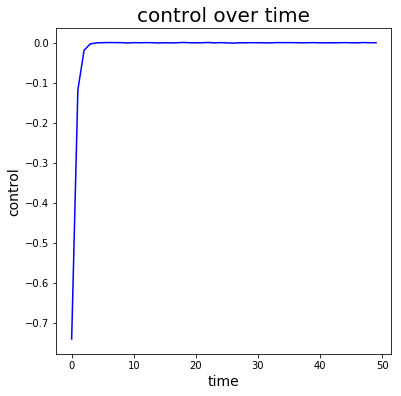

In [5]:
lqr_zero.plot_control(u)

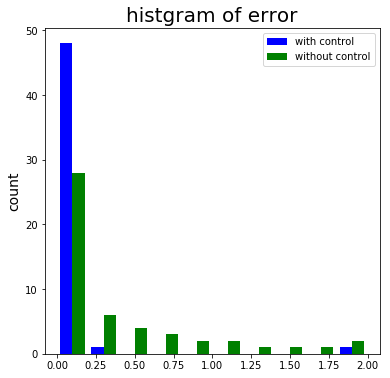

In [6]:
lqr_zero.plot_hist(x, x_tilde, target)

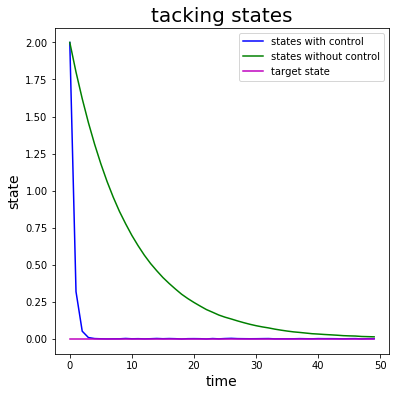

In [7]:
lqr_zero.plot_position(x, x_tilde, target)

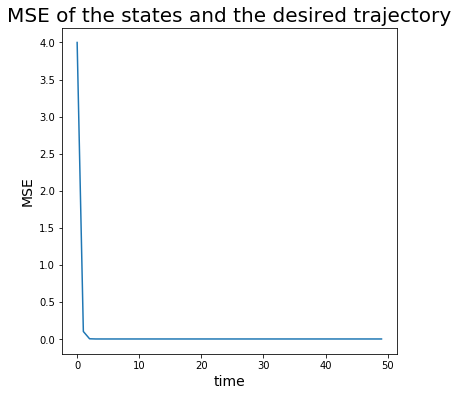

In [8]:
lqr_zero.plot_MSE(target, x)

In [9]:
# N = 50
# noise_array = np.arange(N) * 0.01
# mse_array = np.zeros(N)
# for i in range(N):
#     lqr_temp = LQR_1D(T, ini_state, target, noise_array[i])
#     u, x, x_tilde = lqr_temp.dynamics(a, b, q, r)
#     mse_array[i] = lqr_temp.stableMSE(x, target)

# plt.plot(mse_array)

## LQR for tracking
When the target state, denoted as $\bar{x}$, is not zero staet, the cost function becomes
$$ J(x, u) = \sum_{t = 0}^{T-1} ((x_{t}-\bar{x}_t)^T Q (x_{t}- \bar{x}_t) + (u_{t} - \bar{u}_t)^T R (u_{t} - \bar{u}_t)) + (x_{T} - \bar{x}_T)^T Q_T (x_{T} - \bar{x}_T)$$,

where $\bar{u}_{t}$ is the desired input, i.e. $\bar{x}_{t+1} = Ax_t + B\bar{u}_{t}$.


### Exercise 2: LQR control to desired target
In this excercise, we will use LQR controller to track sinusoid function. 

** Suggestions **
* In the following code, first generate the target trajectory of sinusoid.
* Complete the code in function dynamics_tracking( ) to update the control. In fact, the function dynamics_tracking( ) is a general version of the function dynamcis_zero_state( ), where the latter case take zero state as the target, while the former one can take any trajectory as target. 

* Use the provided plotting functions to plot the states over time with and without control, the control over time, and the histogram of deviation from the zero state with and without control 

In [11]:
target = np.sin(np.arange(T) * 2 * np.pi * 5 /T)
lqr_sine= LQR_1D(T, ini_state, noise_var, target)
u, x, x_tilde = lqr_sine.dynamics_tracking(a, b, q, r)

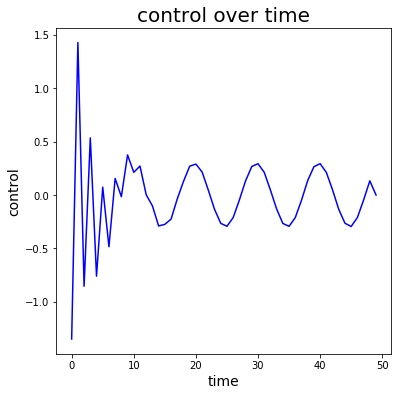

In [12]:
lqr_sine.plot_control(u)

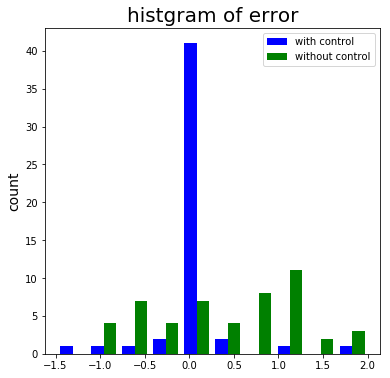

In [13]:
lqr_sine.plot_hist(x, x_tilde, target)

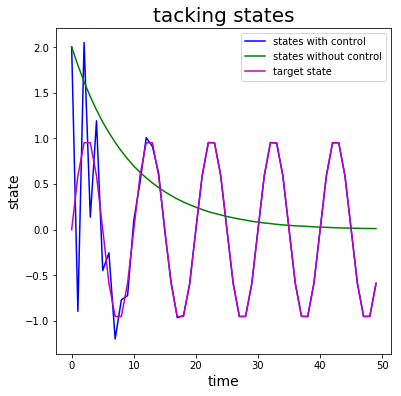

In [14]:
lqr_sine.plot_position(x, x_tilde, target)

## LQG control of uncertain state with finite time horizon
